In [600]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz, DecisionTreeClassifier

<p><font size=3><b>Question 1</b><br />Use the file bank.csv to explore the dataset. Observe the features: Are they numbers? Are they strings? Are they binary? Are they continuous?</font></p>

In [601]:
bank_data = pd.read_csv('bank.csv', sep=';')
bank_data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [602]:
#bank_data.info()

<ul><font size=3><b>Observations</b>
<li>Continuous features: 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'</li>
<li>Binary features (in string form): 'default', 'housing', 'loan', 'y'</li>
<li>Categorical features (in string form): 'job', 'marital', 'education', 'contact', 'month', 'poutcome'</li>
</font></ul>

<p><font size=3><b>Question 2</b><br />Learn about label encoders at the following link and use what you learn to transform the features to numerical features.<br />
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html</font></p>

In [603]:
continuous_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
binary_features = ['default', 'housing', 'loan', 'y']
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
string_features = binary_features + categorical_features
#print string_features
#print len(string_features)

In [604]:
bd_numeric = bank_data.copy()
label_dict = {}

feature_names = bd_numeric.columns
bank_data_values = bd_numeric.values

for each_feature in string_features:
    le = preprocessing.LabelEncoder()
    le.fit(bd_numeric[each_feature])
    label_dict[each_feature] = le
    bd_numeric[each_feature] = le.transform(bd_numeric[each_feature])

In [605]:
bd_numeric.head()
#label_dict
#label_dict['marital'].classes_

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0

<p><font size=3><b>Question 3</b><br />Build a decision tree model to predict whether a prospect will buy the product.</font></p>

In [606]:
#check for missing data
bd_numeric.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [607]:
print bd_numeric.columns
print len(bd_numeric.columns)

Index([u'age', u'job', u'marital', u'education', u'default', u'balance', u'housing', u'loan', u'contact', u'day', u'month', u'duration', u'campaign', u'pdays', u'previous', u'poutcome', u'y'], dtype='object')
17


In [608]:
input_feature_columns = bd_numeric.columns[0:len(bank_data_2.columns)-1]
target_column_name = bd_numeric.columns[len(bank_data_2.columns)-1]
print input_feature_columns
print target_column_name

Index([u'age', u'job', u'marital', u'education', u'default', u'balance', u'housing', u'loan', u'contact', u'day', u'month', u'duration', u'campaign', u'pdays', u'previous', u'poutcome'], dtype='object')
y


In [609]:
X = bd_numeric[input_feature_columns].values
y = bd_numeric[target_column_name].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)

In [610]:
treeclf = DecisionTreeClassifier()
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

In [611]:
y_pred = treeclf.predict(X_test)

In [612]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[753  61]
 [ 56  35]]


In [613]:
feature_cols = bd_numeric.columns
with open("bank_data.dot", 'wb') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

In [614]:
! dot -Tpng bank_data.dot -o bank_data.png

In [615]:
from IPython.display import Image

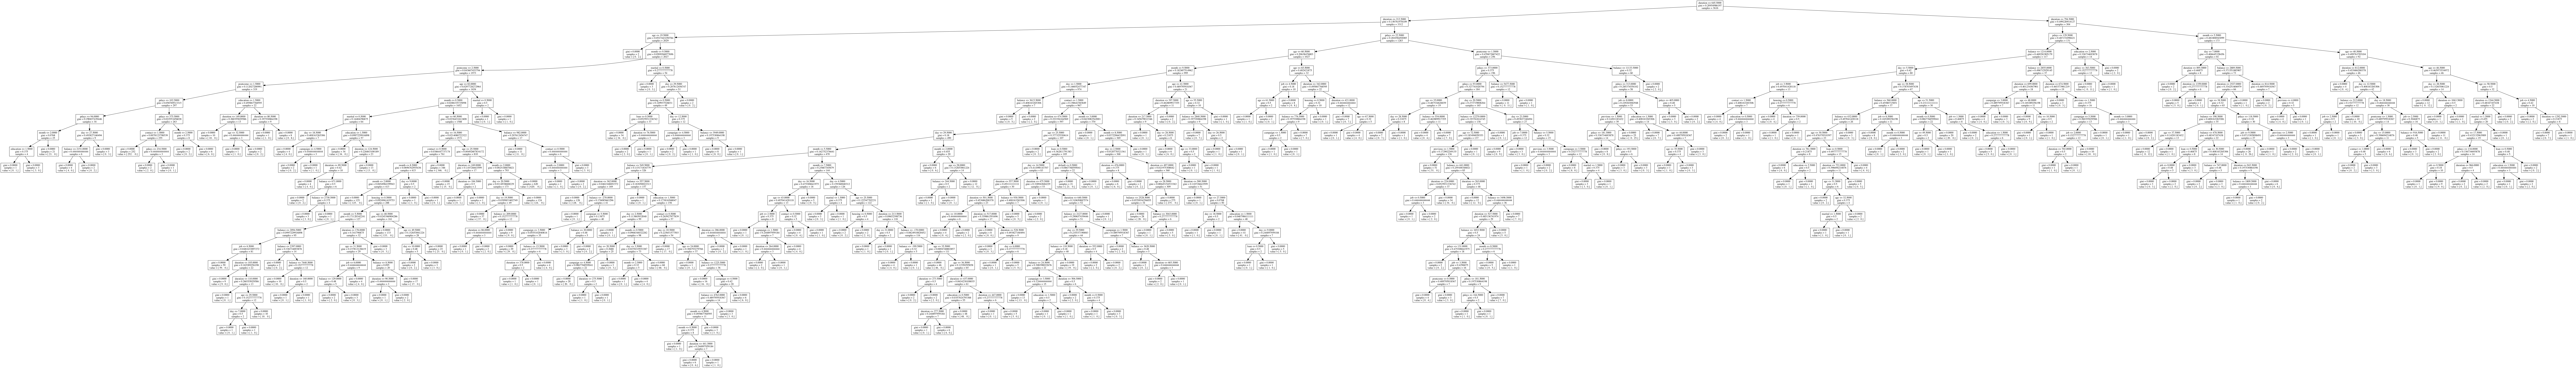

In [616]:
i = Image(filename='bank_data.png')
i

<p><font size=3><b>Question 4</b><br />Evaluate the accuracy of your decision tree model using cross validation.</font></p>

In [617]:
treeclf_cv = DecisionTreeClassifier()

In [618]:
scores = cross_val_score(treeclf_cv, X, y, cv=KFold(len(X), n_folds=5, shuffle=True, random_state=2), scoring='accuracy')

In [619]:
print("Accuracy: {:.2%} (+/- {:.2%}").format(np.mean(scores),(np.std(scores)*2))

Accuracy: 86.22% (+/- 1.64%


<p><font size=3><b>Question 5</b><br />Repeat the analysis and cross validation with the file bank-additional-full.csv. How does the performance of the model change (with the additional training examples and additional features)?</font></p>

In [620]:
bank_data_all = pd.read_csv('bank-additional-full.csv', sep=';')

In [621]:
bank_data_all.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week     ...      campaign  pdays  previous     poutcome  \
0   may         mon     ...             1    999         0  nonexistent   
1   may         mon     ...             1    999         0  nonexistent   
2   may         mon     ...             1    999         0  nonexistent   
3   may         mon     ...             1    999         0  nonexistent   
4   may         mon     ...             1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857         5191  no  
1          1.1          93.994          -36.4      4.857         5191  no  
2          1.1          93.994          -36.4      4.857         5191  no  
3          1.1          93.994          -36.4      4.857         5191  no  
4          1.1          93.994          -36.4      4.857         5191  no  

[5 rows x 21 columns]

In [622]:
#bank_data_all.isnull().sum()
#bank_data_all.describe()
bank_data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)

In [623]:
bd2_string_features = ['job', 'marital', 'education', 'default', 'housing',\
                       'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

In [624]:
bd2_numeric = bank_data_all.copy()
label_dict_2 = {}

for each_feature in bd2_string_features:
    bd2_le = preprocessing.LabelEncoder()
    bd2_le.fit(bd2_numeric[each_feature])
    label_dict_2[each_feature] = bd2_le
    bd2_numeric[each_feature] = bd2_le.transform(bd2_numeric[each_feature])

In [625]:
#label_dict_2
#len(bd2_numeric.columns)
#bank_data_ds2.head()

In [626]:
bd2_numeric_input_feature_cols = [col for col in bd2_numeric.columns if col not in ['y','duration']]
bd2_target_cols = bd2_numeric.columns[len(bank_data_ds2.columns)-1]
print bd2_numeric_input_feature_cols
print target_column_name_ds2

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
y


In [627]:
X_bd2 = bd2_numeric[bd2_numeric_input_feature_cols].values
y_bd2 = bd2_numeric[bd2_target_cols].values

In [628]:
treeclf_bd2 = DecisionTreeClassifier()

In [629]:
scores_bd2 = cross_val_score(treeclf_bd2, X_bd2, y_bd2,\
                cv=KFold(len(X_bd2), n_folds=5, shuffle=True, random_state=0), scoring='accuracy')
scores_bd2

array([ 0.84049527,  0.83600388,  0.83187667,  0.83392012,  0.8404759 ])

In [630]:
print("Accuracy: {:0.2%} (+/- {:.2%})").format(np.mean(scores_bd2),(np.std(scores_bd2)*2))

Accuracy: 83.66% (+/- 0.69%)


In [631]:
X_train_bd2, X_test_bd2, y_train_bd2, y_test_bd2 = train_test_split(X_bd2, y_bd2, random_state=1)
treeclf_bd2.fit(X_train_bd2, y_train_bd2)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

In [632]:
y_pred_bd2 = treeclf_bd2.predict(X_test_bd2)

In [633]:
conf_mat = confusion_matrix(y_test_bd2,y_pred_bd2)
print(conf_mat)

[[8266  866]
 [ 741  424]]


In [634]:
bd2_feature_cols = bd2_numeric.columns
with open("bank_data_2.dot", 'wb') as f:
    f = export_graphviz(treeclf_bd2, out_file=f, feature_names=bd2_feature_cols)

In [635]:
! dot -Tpng bank_data_2.dot -o bank_data_2.png

In [636]:
Image(filename='bank_data_2.png')

Final Assessment: With the additional features and training examples of the larger data set, the model actually becomes somewhat less accurate (by about 3%). The additional features might be adding noise or irrelevant data which is reducing the predictive accuracy of the model. Furthermore, the problem could be related to overfitting, in which case, it might make sense to reduce the size of the training set.